Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


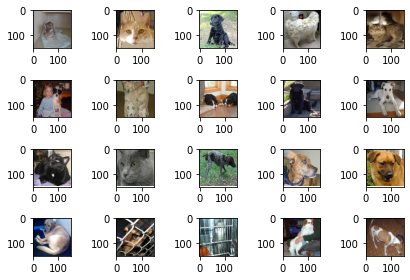

In [3]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '/content/drive/MyDrive/Machine Learning Colab/data/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/Machine Learning Colab/data/cat_dog_small/validation'

# ImageDataGenerator 생성
# train data 생성 ImageDataGenerator, validation data 생성 ImageDataGenerator 각각 생성
# 정규화(MinMaxScaling 이용)
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,                # target directory
    classes=['cats', 'dogs'], # 순서대로 0,1..., classes 속성을 생략하면 폴더 순서대로 label이 결정
    target_size=(150,150),    # 일반적으로 정방향으로 resize, CNN구조에 따라 이 값은 달라진다
    batch_size=20,            # 한번에 20개 이미지 가져와서 변환, label에 상관 없이 가져온다
    class_mode='binary'       # 다중분류면 categorical(default)
                              # 'sparse도 이용가능 - onehot처리 안하고 사용
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,               
    classes=['cats', 'dogs'], 
    target_size=(150,150),   
    batch_size=20,            
    class_mode='binary'
)

# 생성한 generator를 사용하기
for x_data, t_data in train_generator:
  print(x_data.shape) # (20,150,150,3)
  print(t_data.shape) # (20,)
  break

  # 그림 이미지를 matplotlib을 이용해서 출력
fig = plt.figure()
fig_arr = list()
for i in range(20):
  fig_arr.append(fig.add_subplot(4,5,i+1))

for data_batch, lable_batch in train_generator:
  for idx, img_data in enumerate(data_batch):
    fig_arr[idx].imshow(img_data)
  break

plt.tight_layout()
plt.show()

# CNN을 구성하고 학습 진행
# 이전에 했던 MNIST와 유사, convolution, pooling layer 추가

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), 
                 activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())

model.compile(optimizer=Adam(learning_rate=1e-3), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# steps_per_epoch : 몇번 뽑아야 1 epoch이 되는가
history = model.fit(train_generator, steps_per_epoch=100, epochs=30, 
                    validation_data=validation_generator,
                    validation_steps=50)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [9]:
# 학습이 종료된 후 모델을 저장 하기
model.save('/content/drive/MyDrive/Machine Learning Colab/data/cat_dog_small/cat_god_small_cnn_tf2.4.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


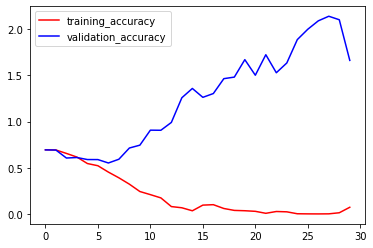

In [15]:
# history 객체 확인
print(history.history.keys())

train_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']

train_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(train_loss, color='r', label='training_accuracy')
plt.plot(validation_loss, color='b', label='validation_accuracy')
plt.legend()
plt.show()

In [16]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


(1, 150, 150, 3)


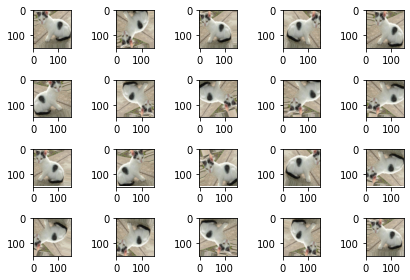

In [23]:
# computer vision에서 이미지를 다룰때 일반적으로 사용하는 과대적합 감소방법이 있다
# 데이터 증식(Data augmentation) : 기존 데이터에 약간의 변형을 주어 데이터를 추가적으로 만들어내는 기법
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# rotation_range : 지정된 각도 범위 내에서 임의로 원본 이미지를 회전
# width_shift_range : 지정된 범위 내에서 임의로 원본 이미지를 가로 방향으로 이동
# height_shift_range : 지정된 범위 내에서 임의로 원본 이미지를 세로 방향으로 이동
# zoom_range : 지정된 범위 내에서 임의로 원본 이미지를 확대하거나 축소
# horizontal_flip : 수평방향으로 이미지 반전
# vertical_flip : 수직방향으로 이미지 반전
datagen = ImageDataGenerator(rotation_range=20, 
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=True)

img = image.load_img('/content/drive/MyDrive/Machine Learning Colab/data/cat_dog_small/train/cats/cat.3.jpg', 
                     target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
print(x.shape)

fig = plt.figure()
fig_arr = list()

for i in range(20):
    fig_arr.append(fig.add_subplot(4,5,i+1))

idx = 0
for batch in datagen.flow(x, batch_size=1):
    fig_arr[idx].imshow(image.array_to_img(batch[0]))
    idx+=1
    if idx % 20 == 0:
        break

fig.tight_layout()
plt.show()

# 증식을 이용한 코드
- 증식은 train만 validataion은 평가용

In [46]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

train_dir = '/content/drive/MyDrive/Machine Learning Colab/data/cat_dog_small/train'
validation_dir = '/content/drive/MyDrive/Machine Learning Colab/data/cat_dog_small/validation'

# ImageDataGenerator 생성
# train data 생성 ImageDataGenerator, validation data 생성 ImageDataGenerator 각각 생성
# 정규화(MinMaxScaling 이용)
train_datagen = ImageDataGenerator(rescale=1/255,                     
                                   rotation_range=20, 
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=True)
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,                # target directory
    classes=['cats', 'dogs'], # 순서대로 0,1..., classes 속성을 생략하면 폴더 순서대로 label이 결정
    target_size=(150,150),    # 일반적으로 정방향으로 resize, CNN구조에 따라 이 값은 달라진다
    batch_size=20,            # 한번에 20개 이미지 가져와서 변환, label에 상관 없이 가져온다
    class_mode='binary'       # 다중분류면 categorical(default)
                              # 'sparse도 이용가능 - onehot처리 안하고 사용
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,               
    classes=['cats', 'dogs'], 
    target_size=(150,150),   
    batch_size=20,            
    class_mode='binary'
)

# 생성한 generator를 사용하기
for x_data, t_data in train_generator:
    print(x_data.shape) # (20,150,150,3)
    print(t_data.shape) # (20,)
    break

# CNN을 구성하고 학습 진행
# 이전에 했던 MNIST와 유사, convolution, pooling layer 추가

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(20, 150, 150, 3)
(20,)


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), 
                 activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=1, activation='sigmoid'))

print(model.summary())

model.compile(optimizer=Adam(learning_rate=1e-4), 
              loss='binary_crossentropy',
              metrics=['accuracy'])

# steps_per_epoch : 몇번 뽑아야 1 epoch이 되는가
history = model.fit(train_generator, steps_per_epoch=100, epochs=50, 
                    validation_data=validation_generator,
                    validation_steps=50)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      